<a href="https://colab.research.google.com/github/gayathrirx/genAI_SentimentAnalysis_Twitter/blob/main/Sentiment_analysis_of_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Install dependencies

In [ ]:
!pip install -q transformers tweepy wordcloud matplotlib

# 2. Set up Twitter API credentials

In [ ]:
import tweepy

# Add Twitter API key and secret
consumer_key = "XXX"
consumer_secret = "XXX"

# Handling authentication with Twitter
auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)

# Create a wrapper for the Twitter API
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# *3. Search for tweets using Tweepy*

In [ ]:
# Helper function for handling pagination in our search and handle rate limits
def limit_handled(cursor):
    while True:
        try:
            yield cursor.next()
        except tweepy.RateLimitError:
            print('Reached rate limite. Sleeping for >15 minutes')
            time.sleep(15 * 61)
        except StopIteration:
            break

# Define the term we will be using for searching tweets
query = '#NFTs'
query = query + ' -filter:retweets'

# Define how many tweets to get from the Twitter API
count = 1000

# Let's search for tweets using Tweepy
search = limit_handled(tweepy.Cursor(api.search,
                        q=query,
                        tweet_mode='extended',
                        lang='en',
                        result_type="recent").items(count))

# 4. Run sentiment analysis on the tweets

In [ ]:
from transformers import pipeline

# Set up the inference pipeline using a model from the 🤗 Hub
sentiment_analysis = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

# Let's run the sentiment analysis on each tweet
tweets = []
for tweet in search:
    try:
      content = tweet.full_text
      sentiment = sentiment_analysis(content)
      tweets.append({'tweet': content, 'sentiment': sentiment[0]['label']})

    except:
      pass

Downloading:   0%|          | 0.00/987 [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Please install emoji: pip3 install emoji
Token indices sequence length is longer than the specified maximum sequence length for this model (153 > 128). Running this sequence through the model will result in indexing errors


# 5.Explore the results of sentiment analysis

In [ ]:
import pandas as pd

# Load the data in a dataframe
pd.set_option('max_colwidth', None)
pd.set_option('display.width', 3000)
df = pd.DataFrame(tweets)

# Show a tweet for each sentiment
display(df[df["sentiment"] == 'POS'].head(1))
display(df[df["sentiment"] == 'NEU'].head(1))
display(df[df["sentiment"] == 'NEG'].head(1))

,tweet,sentiment
1,"@NFTGalIery Warm, exquisite and elegant palette of charming beauty Its price is 2401 ETH. \nhttps://t.co/Ej3BfVOAqc\n#NFTs #NFTartists #art #Bitcoin #Crypto #OpenSeaNFT #Ethereum #BTC",POS


,tweet,sentiment
0,How much our followers made on #Crypto in December:\n#DAPPRadar airdrop — $200\nFree #VPAD tokens — $800\n#GasDAO airdrop — up to $1000\nStarSharks_SSS IDO — $3500\nCeloLaunch IDO — $3000\n12 Binance XMas #NFTs — $360 \nTOTAL PROFIT: $8500+\n\nJoin and earn with us https://t.co/fS30uj6SYx,NEU


,tweet,sentiment
37,Stupid guy #2\nhttps://t.co/8yKzYjCYIl\n\n#NFT #NFTs #nftcollector #rarible https://t.co/O4V19gMmVk,NEG


sentiment
NEG     20
NEU    415
POS    556
dtype: int64


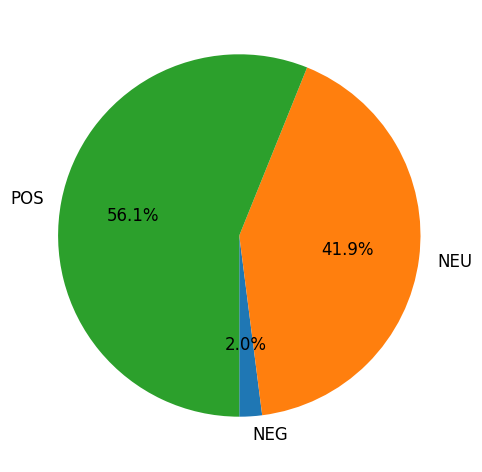

In [ ]:
import matplotlib.pyplot as plt

# Let's count the number of tweets by sentiments
sentiment_counts = df.groupby(['sentiment']).size()
print(sentiment_counts)


# Let's visualize the sentiments
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")

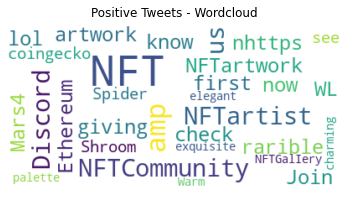

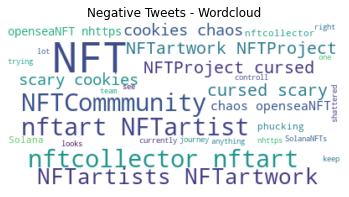

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

# Wordcloud with positive tweets
positive_tweets = df['tweet'][df["sentiment"] == 'POS']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=30, background_color="white", stopwords = stop_words).generate(str(positive_tweets))
plt.figure()
plt.title("Positive Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Wordcloud with negative tweets
negative_tweets = df['tweet'][df["sentiment"] == 'NEG']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
negative_wordcloud = WordCloud(max_font_size=50, max_words=30, background_color="white", stopwords = stop_words).generate(str(negative_tweets))
plt.figure()
plt.title("Negative Tweets - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()